In [1]:
#check the gpu
!nvidia-smi

Wed Jul 21 04:33:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating Helper Functions

It is good idea to put them into github and import them when you need

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-21 04:33:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-21 04:33:01 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
#import helper functions 
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir


##Get the data

use the pre trained models within tf.keras.applications and apply them to our problems.

In [4]:
#get traning data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-21 04:33:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   226MB/s    in 0.7s    

2021-07-21 04:33:04 (226 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
#check out dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [6]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
#checkout clssnames
train_data_10_percent.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
#see a example of batch
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[105.71428     84.71428     55.714287  ]
   [105.04592     84.04592     57.045918  ]
   [ 99.          76.35714     52.785717  ]
   ...
   [ 18.862259    14.862259     3.862259  ]
   [ 19.025515    15.025515     4.025515  ]
   [ 19.357143    15.357142     4.357143  ]]

  [[107.33163     86.2602      59.47449   ]
   [108.92857     86.92857     62.9949    ]
   [103.015305    80.372444    58.015305  ]
   ...
   [ 20.          16.           5.        ]
   [ 20.071428    16.071428     5.0714283 ]
   [ 21.          17.           6.        ]]

  [[107.78571     85.78571     62.57143   ]
   [109.71429     87.71429     66.158165  ]
   [105.88265     83.2398      62.117348  ]
   ...
   [ 20.785715    16.785715     5.785714  ]
   [ 21.          17.           6.        ]
   [ 21.785715    17.785715     6.785714  ]]

  ...

  [[  4.357143     5.357143     0.3571428 ]
   [  4.           5.           0.        ]
   [  6.61734      7.61734      2.61734   ]
   ...
   [  8.           8.   

##Create a transfer learning model using fucntional API

In [12]:
#create base model with tf.keras.applications
base_model =tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model
base_model.trainbale=False

#create inputs into model
inputs =tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# #if using resnet50 you will need to normalzied inputs
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#pass the inputs into base model
x=base_model(inputs)
print(f"Shape after passing inputs though base model :{x.shape}")

#avarage pool the outputs of the model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_poolong_layer")(x)
print(f"Shspe after GlobalAvaragePoolong :{x.shape}")

#create the output activation layer
outputs =tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine inputs outputs 
model_0 =tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent =model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 *len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name ="10_percent_feature_extraction"
                                                   )])


16711680/16705208 [==============================] - 0s 0us/step
Shape after passing inputs though base model :(None, 7, 7, 1280)
Shspe after GlobalAvaragePoolong :(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210721-043316
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 53s 571ms/step - loss: 1.4323 - accuracy: 0.5413 - val_loss: 1.0114 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 10s 421ms/step - loss: 0.3449 - accuracy: 0.9000 - val_loss: 1.0738 - val_accuracy: 0.6809
Epoch 3/5
24/24 [==============================] - 10s 420ms/step - loss: 0.1312 - accuracy: 0.9693 - val_loss: 1.4855 - val_accuracy: 0.6793
Epoch 4/5
24/24 [==============================] - 11s 428ms/step - loss: 0.1056 - accuracy: 0.9720 - val_loss: 1.2322 - val_accuracy: 0.7105
Epoch 5/5
24/24 [==============================] - 11s 434ms/step - loss: 0.0638 - accuracy: 0.9893 - val_loss: 1.5510 - val_accuracy: 0.6694


In [13]:
#evalaut the model
model_0.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 1.6622 - accuracy: 0.6488


[1.662232756614685, 0.6488000154495239]

In [14]:
#check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)


0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [15]:
#summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [16]:
#whole model
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avarage_poolong_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


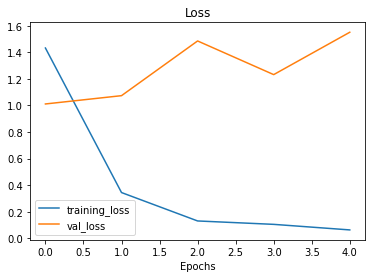

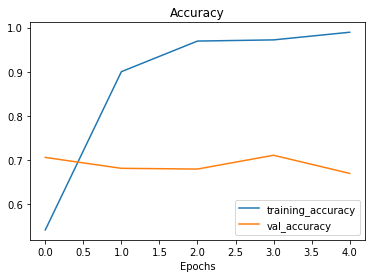

In [17]:
#check out the loss curver
plot_loss_curves(history_10_percent)

##Getting a Feature Vector from Trained Model

In [18]:
#define the input shape
input_shape= (1,4,4,3)

#create random tensor
input_tensor=tf.random.normal(input_shape)
print(f"Random input Tensor :\n {input_tensor} \n ")

#pass the random tensor thought global avarage pooling 2d layer
global_avarage_pooled_tensor =tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Avarage Pooled Random Tensor :\n{global_avarage_pooled_tensor}\n ")

Random input Tensor :
 [[[[ 1.12581275e-01 -7.90233850e-01  9.66198385e-01]
   [ 9.03588176e-01  5.75968981e-01  2.89366573e-01]
   [ 4.65354919e-01  1.90147161e-01  4.58147645e-01]
   [ 7.35506833e-01 -1.10713148e+00  5.30169725e-01]]

  [[ 4.20350105e-01 -3.32537472e-01 -9.33272004e-01]
   [-8.37902725e-03  4.00037795e-01 -8.98544714e-02]
   [ 1.08735967e+00 -1.63470969e-01  6.79954708e-01]
   [ 1.25568777e-01  2.47387495e-02  2.36681625e-01]]

  [[ 1.29101992e+00  6.84471190e-01 -7.39008605e-01]
   [-7.46428788e-01  2.27674627e+00  8.63090932e-01]
   [ 2.08111126e-02 -1.19077362e-01 -4.89366740e-01]
   [ 5.43261886e-01 -1.88238859e-01  1.34089664e-01]]

  [[-2.07350910e-01 -1.47383571e+00 -1.45045555e+00]
   [ 4.30211890e-04  1.22242838e-01  1.05988014e+00]
   [ 1.22989476e+00 -1.55249968e-01 -2.74960637e+00]
   [ 9.95600283e-01  1.20491791e+00 -7.16100752e-01]]]] 
 
2D Global Avarage Pooled Random Tensor :
[[ 0.43557307  0.07184345 -0.12188034]]
 


In [19]:
#check the shape
print(f"shape of the input tensor : {input_tensor.shape}")
print(f"shape of the global avarage pooled 2d tensor : {global_avarage_pooled_tensor.shape}")

shape of the input tensor : (1, 4, 4, 3)
shape of the global avarage pooled 2d tensor : (1, 3)


In [20]:
#replicate the global avarage pool 2d
tf.reduce_mean(input_tensor,axis=[1,2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.43557307,  0.07184345, -0.12188034]], dtype=float32)>

##Running a series of tranfer leraning experiments



In [21]:
#Downlaod and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-07-21 04:35:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   241MB/s    in 0.5s    

2021-07-21 04:35:24 (241 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
#craete test and train
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir_1_percent="10_food_classes_1_percent/test"


##Preprocess data

In [23]:
#check for the images
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [24]:
#setup data loaders
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

test_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


##Adding Data Augmetation into Model

In [25]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#craete data augmentation with horizontal flipping,rotation,zooms

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2)
                                   
],name="data_augmentation")

In [26]:
data_augmentation

##Visualize the Data Augmentation Layer

10_food_classes_1_percent/train/steak/3621464.jpg


(-0.5, 411.5, 533.5, -0.5)

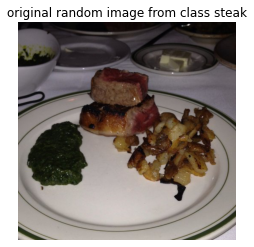

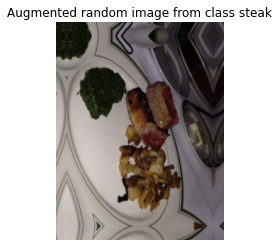

In [27]:
#view the random image and comapre it with the augmeted version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class =random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/" +target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path =target_dir +"/"+random_image
print(random_image_path)

#read in the random image
img =mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class {target_class}")
plt.axis(False)

#plot our augmented random image
augmented_img =data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)

##Model 1 :Feature extraction transfer learning with 1 percent of data

In [28]:
#setup the input shape
input_shape =(224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#crate the input layer
inputs =layers.Input(shape=input_shape,name="input_layer")

#add in data augmentation sequentional model as layer
x=data_augmentation(inputs)

#give base_model the inputs
x=base_model(x,training=False)

#pool output features of the model
x=layers.GlobalAveragePooling2D()(x)

#put a dense layer on the output
outputs =layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_1 =keras.Model(inputs,outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1_percent =model_1.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               
                               #track model callbacks
                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="1_percent_data_augmented")]
                               )

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20210721-043528
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 12s 3s/step - loss: 2.3932 - accuracy: 0.1286 - val_loss: 2.2723 - val_accuracy: 0.1398
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1992 - accuracy: 0.2286 - val_loss: 2.1762 - val_accuracy: 0.1924
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9872 - accuracy: 0.3000 - val_loss: 2.0610 - val_accuracy: 0.2516
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.8693 - accuracy: 0.3286 - val_loss: 1.9441 - val_accuracy: 0.3470
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6734 - accuracy: 0.4857 - val_loss: 1.8727 - val_accuracy: 0.3849


In [29]:
#model summary
model_1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [30]:
#evaluate on full dataset
results_1_percent_model=model_1.evaluate(test_data)
results_1_percent_model

79/79 [==============================] - 9s 109ms/step - loss: 1.8799 - accuracy: 0.3828


[1.8798798322677612, 0.38280001282691956]

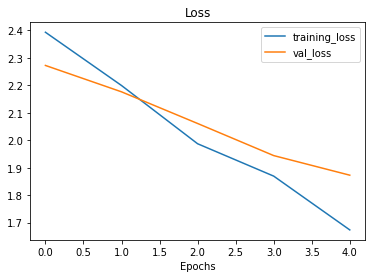

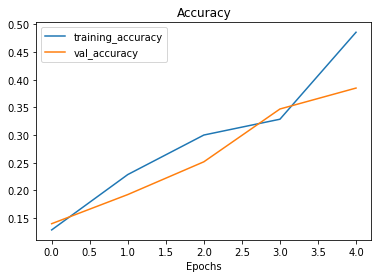

In [31]:
#loss curves
plot_loss_curves(history_1_percent)

##Model with 10 percent Augmented Data


In [32]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#craete data augmentation with horizontal flipping,rotation,zooms

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2)
                                   
],name="data_augmentation")

In [34]:
#setup the input shape
input_shape =(224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#crate the input layer
inputs =layers.Input(shape=input_shape,name="input_layer")

#add in data augmentation sequentional model as layer
x=data_augmentation(inputs)

#give base_model the inputs
x=base_model(x,training=False)

#pool output features of the model
x=layers.GlobalAveragePooling2D()(x)

#put a dense layer on the output
outputs =layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_2 =keras.Model(inputs,outputs)

#compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



##Creating a model checkpoint callbacks

In [35]:
#checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoints.ckpt"

#create a model checkpoint callback that saves weights
checkpoint_callback =tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights=True,
                                                        save_best_only=False,
                                                        save_freq="epoch",
                                                        verbose=1)

##Fit the model 2 with callbacks

In [36]:
#fit the model
initial_epochs =5

history_model_2 =model_2.fit(train_data_10_percent,
                               epochs=initial_epochs,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               
                               #track model callbacks
                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="10_percent_data_augmented"),
                                          checkpoint_callback
                                          ]
                               )

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20210721-043614
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 601ms/step - loss: 1.9717 - accuracy: 0.3347 - val_loss: 1.4627 - val_accuracy: 0.6645

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 2/5
24/24 [==============================] - 11s 438ms/step - loss: 1.3189 - accuracy: 0.6693 - val_loss: 1.0635 - val_accuracy: 0.7566

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 3/5
24/24 [==============================] - 10s 396ms/step - loss: 1.0571 - accuracy: 0.7520 - val_loss: 0.8826 - val_accuracy: 0.7944

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 4/5
24/24 [==============================] - 11s 425ms/step - loss: 0.9071 - accuracy: 0.7747 - val_loss: 0.7739 - val_accuracy: 0.8026

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 5/5
24/24 [==============================] - 9s 366ms/step - loss: 0.7822 - accuracy: 0.8053 - val_loss: 0.7111 - val_accuracy: 0.8043

Epoch 00005: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets


In [37]:
#evaluate
model_0.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 1.6622 - accuracy: 0.6488


[1.6622326374053955, 0.6488000154495239]

In [38]:
results_model_2=model_2.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6907 - accuracy: 0.8180


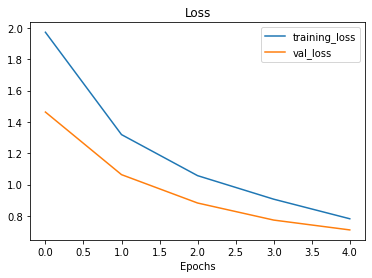

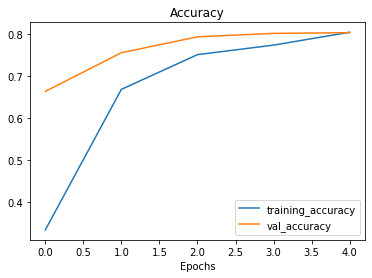

In [39]:
plot_loss_curves(history_model_2)

##Loading in checkpointed Weights

In [40]:
#loadin saved model weights
model_2.load_weights(checkpoint_path)

In [41]:
#evaluate model_2 with loaded model
loaded_weight_model_results=model_2.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.6907 - accuracy: 0.8180


In [42]:
#check to see loaded resuls with create model
import numpy as np
np.isclose(np.array(results_model_2),np.array(loaded_weight_model_results))

array([ True,  True])

In [43]:
#check the difference

print(np.array(results_model_2)-np.array(loaded_weight_model_results))

[-2.38418579e-07  0.00000000e+00]


##Fine Tune existing Model on 10% data

In [44]:
#layers in model
model_2.layers

In [45]:
#trainable layers
for layer in model_2.layers:
  print(layer,layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f16fa38ad10> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f175d159f90> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f157f348e10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1700143e50> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f157f36c2d0> True


In [47]:
for i, layer in enumerate( model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [50]:
#trainable varibles in base model

print(len(model_2.layers[2].trainable_variables))

0


In [55]:
#setup the last 10 layers to traibale
base_model.trainable=True

#freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable =False


#recompile the model after change
model_2.compile(loss="categorical_crossentropy",
                
                #when fine tuning typically low the learning rate by 10x
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics =["accuracy"])



In [58]:
#Check for the layers
int(len(model_2.layers[2].trainable_variables))

10

In [59]:
for i, layer in enumerate( model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [64]:
#fine tune for more epochs
fine_tune_epochs =initial_epochs+5

#refit the model with more trainble layers
history_fine_10_percent_data_aug  =model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25*len(test_data)),
                                               
                                               #start training from last epoch
                                               initial_epoch=history_model_2.epoch[-1],
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_model")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_model/20210721-052919
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 10s 384ms/step - loss: 0.3287 - accuracy: 0.9067 - val_loss: 0.4767 - val_accuracy: 0.8421
Epoch 6/10
24/24 [==============================] - 9s 361ms/step - loss: 0.2944 - accuracy: 0.9173 - val_loss: 0.4787 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 9s 350ms/step - loss: 0.2831 - accuracy: 0.9133 - val_loss: 0.5127 - val_accuracy: 0.8355
Epoch 8/10
24/24 [==============================] - 8s 339ms/step - loss: 0.2284 - accuracy: 0.9387 - val_loss: 0.4970 - val_accuracy: 0.8405
Epoch 9/10
24/24 [==============================] - 9s 367ms/step - loss: 0.2285 - accuracy: 0.9347 - val_loss: 0.4821 - val_accuracy: 0.8306
Epoch 10/10
24/24 [==============================] - 9s 361ms/step - loss: 0.1938 - accuracy: 0.9493 - val_loss: 0.4824 - val_accuracy: 0.8405


In [65]:
#evaluate the model
fine_tune_model_results=model_2.evaluate(test_data)
fine_tune_model_results

79/79 [==============================] - 9s 106ms/step - loss: 0.4908 - accuracy: 0.8372


[0.4907805621623993, 0.8371999859809875]

In [66]:
results_model_2

[0.6907259225845337, 0.8180000185966492]

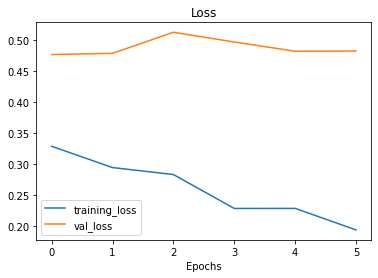

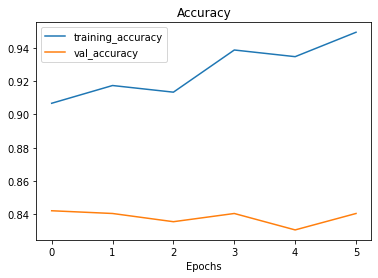

In [67]:
plot_loss_curves(history_fine_10_percent_data_aug)

##Function to comapre Histories of the Model

In [81]:
#fucntion
def compare_histories(original_history,new_history,initial_epochs=5):
  """
  Comapares two tensorflow history objects
  """
  #get original history measurements

  acc=original_history.history["accuracy"]
  loss=original_history.history["loss"]

  val_acc=original_history.history["val_accuracy"]
  val_loss=original_history.history["val_loss"]


  #combine original history
  total_acc=acc+new_history.history["accuracy"]
  total_loss=loss+new_history.history["loss"]

  total_val_acc=val_acc+new_history.history["val_accuracy"]
  total_val_loss=val_loss+new_history.history["val_loss"]

  #make plots accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Val Accuracy")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and validation Accuracy")

   #make plots los
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss,label="Val Loss")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and validation loss")

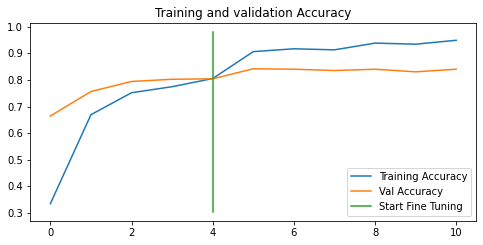

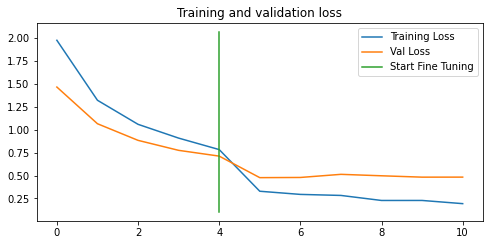

In [82]:
compare_histories(history_model_2,
                  history_fine_10_percent_data_aug,
                  initial_epochs=5)

##Model 4 -Fine tune existng model on all data

In [83]:
#Downlaod all dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-07-21 06:06:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.199.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   271MB/s    in 1.8s    

2021-07-21 06:06:03 (271 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [84]:
#setup training and test data
train_dir_all_data="10_food_classes_all_data/train"
test_dir_all_data="10_food_classes_all_data/test"



In [85]:
#check the data
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [87]:
#setup data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_classes_all_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                   label_mode="categorical",
                                                                                   image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir_all_data,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [88]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.4908 - accuracy: 0.8372


[0.49078065156936646, 0.8371999859809875]

In [90]:
fine_tune_model_results

[0.4907805621623993, 0.8371999859809875]

In [91]:
#load a model weights from checkpoint, we can fine tune 10 percent data model

model_2.load_weights(checkpoint_path)

In [92]:
#evaluate model_2
model_2.evaluate(test_data)


79/79 [==============================] - 9s 106ms/step - loss: 0.6907 - accuracy: 0.8180


[0.6907259225845337, 0.8180000185966492]

In [93]:
#chek back to reverted results
results_model_2

[0.6907259225845337, 0.8180000185966492]

##Steps followed

1.trained a feature extraction model for 5 epochs on 10% data and saved model on callbacks

2.fine tune same model with same 10%percent data with more 5 epochs with unfrozen layers

3.saved the results and logs each time

4,reloaded the model from step 1 to do same steps as 2 except with using all data

In [96]:
#check the tunable layers
for layer_number,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 output_layer True


In [98]:
#check for the base model
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [100]:
#recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer =tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


In [101]:
#continue and fine the model on full train data
fine_tune_epochs=initial_epochs+5

history_fine_10_classes_full =model_2.fit(train_data_10_classes_all_data,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          initial_epoch=history_model_2.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="full_10_classes_fine_tune")])



Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune/20210721-063359
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 39s 142ms/step - loss: 0.7260 - accuracy: 0.7647 - val_loss: 0.4167 - val_accuracy: 0.8832
Epoch 6/10
235/235 [==============================] - 49s 209ms/step - loss: 0.5872 - accuracy: 0.8093 - val_loss: 0.3983 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 56s 235ms/step - loss: 0.5313 - accuracy: 0.8323 - val_loss: 0.3551 - val_accuracy: 0.8931
Epoch 8/10
235/235 [==============================] - 51s 213ms/step - loss: 0.4735 - accuracy: 0.8464 - val_loss: 0.3469 - val_accuracy: 0.8865
Epoch 9/10
235/235 [==============================] - 48s 201ms/step - loss: 0.4395 - accuracy: 0.8593 - val_loss: 0.3452 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 46s 193ms/step - loss: 0.4128 - accuracy: 0.8660 - val_loss: 0.3386 - val_accuracy: 0.8947


In [102]:
#evaluate the model

results_fine_tune_full_data=model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 9s 109ms/step - loss: 0.3190 - accuracy: 0.8984


[0.3190186619758606, 0.8984000086784363]

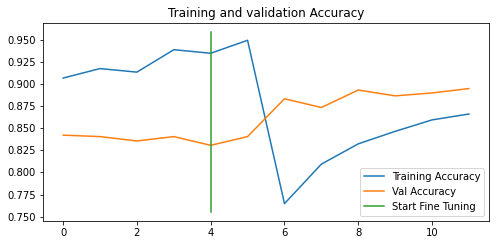

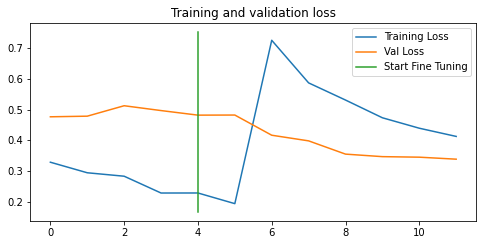

In [103]:
#compare histories

compare_histories(original_history=history_fine_10_percent_data_aug,
                  new_history=history_fine_10_classes_full,
                  initial_epochs=5)

##View experiment data on tensorboard


link :https://tensorboard.dev/experiment/bx00VaOYREW2dktOCX4Qqw/


In [107]:
# #view tensorboard logs of transfer leraning experients/upload dev records
# !tensorboard dev upload --logdir ./transfer_learning/ \
#   --name "Transfer Learning Experiments with Food101 classes" \
#   --description "Different experiments with varying the amount of data" \
#   --one_shot
